# Group Project - Cat Image Classification

## Group 4: Isaiah Martinez, Joycelyn Tuazon
## Mrs. Lord - Comp 542 Machine Learning

# Guides that may provide insight

In [ ]:
#Count objects
#https://new.pythonforengineers.com/blog/image-and-video-processing-in-python/

#Basic outline for image classificaiton. See youtube video too.
#https://www.youtube.com/watch?v=il8dMDlXrIE
#https://github.com/computervisioneng/image-classification-python-scikit-learn/blob/master/main.py

#Image classification with Tensorflow and Keras
#https://www.tensorflow.org/tutorials/images/classification

#Load and Preprocess Images
#https://www.tensorflow.org/tutorials/load_data/images

## Kaggle Examples with Code to look at

In [ ]:
# Good to model after
# Also in the Conv2D section
# https://www.kaggle.com/code/shaileshkakade/image-classification-cat-dog-panda

# plots vertical/horizontal edge detection
# https://www.kaggle.com/code/dianalaveena/cnn-keras-image-classification
# Consider KNN

## CNN Examples

In [ ]:
# https://www.kaggle.com/code/dongduongminh/cnn-deep-learning-image-classification
# https://www.kaggle.com/code/nasrinjahanripa/animal-images-classification-cnn
# https://www.kaggle.com/code/corneliustantius/classification-with-keras-cnn
# SEE `explaining-line.ipynb`

## ConNeXt

In [ ]:
# https://www.kaggle.com/code/chenjiarui2018/cats-dogs-and-pandas-convnext#3.-Model

## VGG16 CNN

In [ ]:
# https://www.kaggle.com/code/arpita12/cat-dog-panda
# https://www.kaggle.com/code/rwt1998/animal-classification
# https://www.kaggle.com/code/atmaraiprince/animal-image-dataset
# https://www.kaggle.com/code/kkamal2003/animal-images-cnn

## Conv 2D

In [ ]:
# https://www.kaggle.com/code/shaileshkakade/image-classification-cat-dog-panda
# https://www.kaggle.com/code/etienne1976/animal-image-classification-with-keras
# https://www.kaggle.com/code/bygbrains/dog-cat-pandas-image-classifier
# https://www.kaggle.com/code/dianalaveena/cnn-keras-image-classification#5.-Model-Building-and-Compilation

## Res Net 50

In [ ]:
# https://www.kaggle.com/code/nasrinjahanripa/animal-images-classification-cnn
# https://www.kaggle.com/code/profmedo/image-classification-cnn-with-resnet
# https://www.kaggle.com/code/kkamal2003/resnet-for-classification
# https://www.kaggle.com/code/arshnoor7389/resnet-for-classification

## OpenAI - CLIP
## Dont use CLIP as project. CLIP may provide insight or be compared to, but not submitted for grade

In [ ]:
# GITHUB LINK:
# https://github.com/openai/CLIP/blob/main/model-card.md#model-card-clip
# https://www.kaggle.com/code/kimchanyoung/zero-shot-prediction-using-openai-s-clip

# Individual Work:

In [1]:
#Resize all images into arrays
import projHelper as pjH

cats_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/cats/")
dogs_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/dogs/")
panda_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/panda/")

#each image is an array of 750,000 (500 * 500 * 3)
print(cats_resized[0])
print(cats_resized[0].shape)

#Resized cat/dog/panda images into a single array of size 994/990/968
print("# cat imgs", len(cats_resized))
print("# dog imgs", len(dogs_resized))
print("# panda imgs", len(panda_resized))
print("total dataset size is", len(cats_resized) + len(dogs_resized) + len(panda_resized))

#14 second runtime

[119. 120. 120. ...  37.  37.  38.]
(250000,)
# cat imgs 994
# dog imgs 990
# panda imgs 968
total dataset size is 2952


In [2]:
#Save the modified images into animals_cleaned_GS directory
import projHelper as pjH

pjH.saveModifiedImages("animals_cleaned/cats/", "animals_cleaned_GS/cats/")

In [3]:
#create labels and combine data into a single array

#insert labels into array
labels = ["cat"] * len(cats_resized) + ["dog"] * len(dogs_resized) + ["panda"] * len(panda_resized)

#combine data into a single array
data_resized = [*cats_resized, *dogs_resized, *panda_resized]

#compare sizes of labels and data_resized since they should be the same
#expected: True
print(len(data_resized) == len(labels))

#testing labels
#expected: cat cat dog dog panda panda
print(labels[0], labels[993], labels[994], labels[1983], labels[1984], labels[2951])

True
cat cat dog dog panda panda


In [4]:
#split the data into train and test
from sklearn.model_selection import train_test_split

#80/20 split
xTrain, xTest, yTrain, yTest = train_test_split(data_resized, labels, test_size = 0.2)

print(len(xTrain), xTrain, "\n")
print(len(yTrain), yTrain, "\n")
print(len(xTest), xTest, "\n")
print(len(yTest), yTest, "\n")

#each array in xTrain and xTest is of type: float32
#the max value from xTrain and xTest is 255

2361 [array([54., 49., 46., ..., 43., 50., 48.], dtype=float32), array([115.,  83.,  36., ..., 182., 174., 168.], dtype=float32), array([132., 127., 131., ...,  92., 109., 123.], dtype=float32), array([ 82.,  55., 118., ...,  43., 110.,  67.], dtype=float32), array([ 71.,  67.,  74., ..., 237., 239., 242.], dtype=float32), array([135., 134., 134., ...,  98.,  94.,  94.], dtype=float32), array([99., 98., 83., ..., 75., 66., 71.], dtype=float32), array([104., 104., 102., ..., 203., 204., 204.], dtype=float32), array([41., 37., 37., ..., 17., 18., 19.], dtype=float32), array([119., 117., 112., ..., 103.,  87.,  80.], dtype=float32), array([148., 148., 148., ..., 133., 134., 137.], dtype=float32), array([166., 142., 147., ..., 201., 192., 185.], dtype=float32), array([173., 173., 173., ..., 124., 124., 124.], dtype=float32), array([ 58.,  60.,  48., ..., 142., 153., 144.], dtype=float32), array([49., 45., 44., ..., 25., 24., 23.], dtype=float32), array([82., 81., 75., ..., 71., 70., 64.], 

In [5]:
#########################################################
#                       Notes                           #
#########################################################

# print out Accuracy, Specificity, Recall, F1 Score. If possible, also the Confusion Matrix

# Analyze model for Over/Underfitting so that it can be reduced

# Use/find an alg to balance the class vs not class for images (Cat vs Non-Cat)

# possibly convert rgb images to grayscale using GLCM
#      might want to compare rgb images and grayscale

In [6]:
# #Confusion Matrix
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# cm = confusion_matrix([Y TEST DATA], [Y PREDICTIONS FROM MODEL], labels = [MODEL].classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [MODEL].classes_)
# disp.plot()
# plt.show()

#This is the code that I ran to obtain the Confusion Matrix for SVM

## Isaiah Martinez

## SVM Classifier

### Testing the svm classifier with no parameter changes

In [7]:
#feed dataset into model

from sklearn import svm

clf = svm.SVC(kernel = 'linear', cache_size = 2000, max_iter = 5000, decision_function_shape = 'ovo', verbose = True)
clf.fit(xTrain, yTrain)

#15 minute runtime

#10 minute runtime

[LibSVM]

c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(cache_size=2000, decision_function_shape='ovo', kernel='linear',
    max_iter=5000, verbose=True)

In [8]:
#predict and obtain metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

yPred = clf.predict(xTest)

acc = accuracy_score(yTest, yPred)
f1 = f1_score(yTest, yPred, average = 'weighted')
prec = precision_score(yTest, yPred, average = 'weighted')
recall = recall_score(yTest, yPred, average = 'weighted')

print(acc, f1, prec, recall)

#4 minute runtime (750,000)

#metrics:
#0.5617597292724196 0.570465072568459 0.591411754950014 0.5617597292724196

#2 minute runtime (250,000)

#metrics:
#0.5617597292724196 0.570465072568459 0.591411754950014 0.5617597292724196

0.4703891708967851 0.4771163042413536 0.5048615896397679 0.4703891708967851


### Pipeline + GridSearch

In [14]:
###     Final Pipeline
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from os import cpu_count

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', svm.SVC(cache_size = 16000, max_iter = 5000, decision_function_shape = 'ovr', verbose = True))
])

params = {
    'classifier__C' : [100, 10, 1, 0.1, 0.01],
    'classifier__gamma' : [100, 10, 1, 0.1, 0.01]
}

# [100, 10, 1, 0.1, 0.01]

gridSearch = GridSearchCV(pipeline, params, cv = 5, n_jobs = cpu_count() - 1, verbose = 4)

gridSearch.fit(xTrain, yTrain)

#1750 minute runtime (initial 750,000) (250 fits)
#100 minute runtime   (initial 250,000) (1 fit)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
#print the best params and best model found from Grid Search
gridSearchParams = gridSearch.best_params_
gridSearchModel = gridSearch.best_estimator_

print(gridSearchParams, gridSearchModel)

{'classifier__C': 1} Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1, cache_size=16000, max_iter=10000, verbose=True))])


In [ ]:
#prediction and metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

yPred = gridSearchModel.predict(xTest)

acc = accuracy_score(yTest, yPred)
f1 = f1_score(yTest, yPred, average = 'weighted')
prec = precision_score(yTest, yPred, average = 'weighted')
recall = recall_score(yTest, yPred, average = 'weighted')

print(acc, f1, prec, recall)
#4 minute runtime

#initial run stats:
#0.5854483925549916 0.5885099209700294 0.5983072203381199 0.5854483925549916

#12 minute runtime 1 fit

#initial run stats: 1 fit
#0.6091370558375635 0.6054727828929725 0.6030864613210003 0.6091370558375635

0.6091370558375635 0.6054727828929725 0.6030864613210003 0.6091370558375635


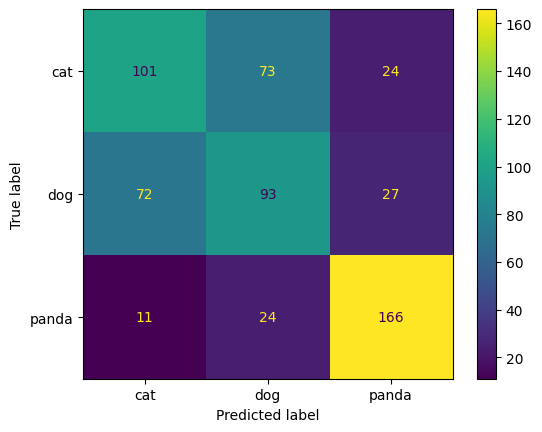

In [ ]:
#Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(yTest, yPred, labels = gridSearchModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gridSearchModel.classes_)
disp.plot()
plt.show()

## Joycelyn Tuazon

In [ ]:
#Code here...

import keras
import projHelper as pjH
import pandas as pd

